<a href="https://colab.research.google.com/github/RavinduPabasara/caption-generator-research/blob/main/ResearchProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modules

In [ ]:
import os
from os import listdir
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import os

BASE_DIR = '/content/drive/My Drive/Flickr8k'
WORKING_DIR = os.path.join(BASE_DIR, 'Images')
print("BASE_DIR:", BASE_DIR)
print("WORKING_DIR:", WORKING_DIR)



BASE_DIR: /content/drive/My Drive/Flickr8k
WORKING_DIR: /content/drive/My Drive/Flickr8k/Images


In [ ]:
# #BASE_DIR = '/kaggle/input/flickr8k'
# #WORKING_DIR = '/kaggle/working'
# BASE_DIR = r'C:\Isura'
# WORKING_DIR = r'C:\Isura\Flickr8k'

In [ ]:
# directory = os.path.join(WORKING_DIR, 'Images')

In [ ]:
!ls "$WORKING_DIR"


ls: cannot access '/content/drive/My Drive/Flickr8k/Images': No such file or directory


In [ ]:
print(BASE_DIR)
print(WORKING_DIR)
print(directory)

/content/drive/My Drive/Flickr8k
/content/drive/My Drive/Flickr8k/Images


NameError: name 'directory' is not defined

In [ ]:
# Import necessary modules
import os
from os import listdir
import pickle
import numpy as np
from tqdm.notebook import tqdm

# Import Keras and TensorFlow modules
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set up base and working directories
BASE_DIR = '/content/drive/My Drive/Flickr8k'
WORKING_DIR = os.path.join(BASE_DIR, 'Images')

# Print directory paths to confirm
print("BASE_DIR:", BASE_DIR)
print("WORKING_DIR:", WORKING_DIR)

# Check if the directory exists and list contents
!ls "$WORKING_DIR"


Mounted at /content/drive
BASE_DIR: /content/drive/My Drive/Flickr8k
WORKING_DIR: /content/drive/My Drive/Flickr8k/Images
 1000268201_693b08cb0e.jpg   2701603045_6cbdc4ce7c.jpg	      3391209042_d2de8a8978.jpg
 1001773457_577c3a7d70.jpg   2701895972_8605c4e038.jpg	      3391924827_53b31542ce.jpg
 1002674143_1b742ab4b8.jpg   2702506716_17a7fb3ba4.jpg	      3392019836_c7aeebca1c.jpg
 1003163366_44323f5815.jpg   270263570_3160f360d3.jpg	      3392293702_ccb0599857.jpg
 1007129816_e794419615.jpg   2703155733_19ac6f97a8.jpg	      3392851587_a638ff25e2.jpg
 1007320043_627395c3d8.jpg   2704257993_d485058a5f.jpg	      3393035454_2d2370ffd4.jpg
 1009434119_febe49276a.jpg   2704362232_7d84503433.jpg	      3393152604_27bd1037f2.jpg
 1012212859_01547e3f17.jpg   2704379125_9c35650d16.jpg	      3393343330_b13df4d8ec.jpg
 1015118661_980735411b.jpg   2704934519_457dc38986.jpg	      3393394134_0caac47e1c.jpg
 1015584366_dfcec3c85a.jpg   2705793985_007cc703fb.jpg	      3393446245_37dd3f3b59.jpg
 10165450

In [ ]:
directory = WORKING_DIR

#Extract Image Features

In [ ]:
# load vgg16 model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summarize
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tqdm import tqdm
import os


# extract features from image
features = {}
#directory = os.path.join(BASE_DIR, 'Images')
print(directory)

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

/content/drive/My Drive/Flickr8k/Images


100%|██████████| 8093/8093 [13:27<00:00, 10.02it/s]


In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tqdm import tqdm

# Use previously defined BASE_DIR to set the directory path
directory = os.path.join(BASE_DIR, 'Images')

# Initialize dictionary to store features
features = {}

# Ensure the directory exists
if not os.path.isdir(directory):
    raise FileNotFoundError(f"Directory not found: {directory}")
else:
    print(f"Directory found: {directory}")

# Loop over each image in the directory
for img_name in tqdm(os.listdir(directory)):
    img_path = os.path.join(directory, img_name)

    # Load the image and process it
    image = load_img(img_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)

    # Extract features
    feature = model.predict(image, verbose=0)

    # Get image ID and store features
    image_id = os.path.splitext(img_name)[0]
    features[image_id] = feature

print("Feature extraction complete.")



NameError: name 'BASE_DIR' is not defined

In [ ]:
#Store features in pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pk1'), 'wb'))

In [ ]:
#Load features from pickle
with open(os.path.join(WORKING_DIR, 'features.pk1'), 'rb') as f:
    features = pickle.load(f)

In [ ]:
# Load the captions data
with open(BASE_DIR + '/captions.txt', 'r') as f:
    next(f)
    captions_doc = f.read()



In [ ]:
#Create mapping of image to captions
mapping= {}
#Process lines
for line in tqdm(captions_doc.split('\n')):
    #Split the line by comma(,)
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    #Remove extension from image ID
    image_id = image_id.split('.')[0]
    #Convert caption list to string
    caption = " ".join(caption)
    #Create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    #Store the caption
    mapping[image_id].append(caption)

100%|██████████| 40456/40456 [00:00<00:00, 429382.75it/s]


In [ ]:
len(mapping)

8091

#Preprocess Text Data

In [ ]:
# def clean(mapping):
#   for key, captions in mapping.items():
#     for i in range(len(captions)):
#       #take one caption at a time
#       caption= captions[i]
#       #preprocessing steps
#       #convert to lowercase
#       caption= caption.lower()
#       #delete digits, special characters, etc...
#       caption= caption.replace('[^A-Za-z]', '')
#       #delete additional spaces
#       caption= caption.replace('\s+', ' ')
#       #add start and end tags to the caption
#       caption= '<start> ' + " ".join([word for word in caption.split() if len(word)>1]) + ' <end>'
#       captions[i] = caption

import re

def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special characters, etc... (using regex)
            caption = re.sub(r'[^A-Za-z\s]', '', caption)
            # delete additional spaces (using regex)
            caption = re.sub(r'\s+', ' ', caption)
            # add start and end tags to the caption
            caption = '<start> ' + " ".join([word for word in caption.split() if len(word) > 1]) + ' <end>'
            captions[i] = caption


In [ ]:
#before preprocess of text
mapping['47870024_73a4481f7d']


['A boy in yellow is riding a scooter on the street .',
 'A boy on a scooter .',
 'A boy wearing a helmet rides a scooter in a suburban neighborhood .',
 'A child on a scooter is jumping the curb .',
 'a young boy wearing an orange helmet riding a scooter']

In [ ]:
#preprocess the text
clean(mapping)

In [ ]:
#after preprocess of text
mapping['47870024_73a4481f7d']

['<start> boy in yellow is riding scooter on the street <end>',
 '<start> boy on scooter <end>',
 '<start> boy wearing helmet rides scooter in suburban neighborhood <end>',
 '<start> child on scooter is jumping the curb <end>',
 '<start> young boy wearing an orange helmet riding scooter <end>']

In [ ]:
all_captions = []
for key in mapping:
  for caption in mapping[key]:
    all_captions.append(caption)

In [ ]:
len(all_captions)

40455

In [ ]:
#tokenize the text
tokenizer= Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size= len(tokenizer.word_index) + 1

In [ ]:
vocab_size

8766

In [ ]:
#get maximum length of the caption available
max_length= max(len(caption.split()) for caption in all_captions)
max_length

#Train Test Split

In [ ]:
image_ids= list(mapping.keys())
split= int(len(image_ids) * 0.90)
train= image_ids[:split]
test= image_ids[split:]

In [ ]:
#create data generator to get data in batch(avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
  #loop over images
  X1, X2, y= list(), list(), list()
  n=0
  while 1:
    for key in data_keys:
      n += 1
      if key not in features:
        print(f"Key '{key}' not found in features")
        continue
      captions= mapping[key]
      #process each caption
      for caption in captions:
        #encode the sequence
        seq= tokenizer.texts_to_sequences([caption])[0]
        #split the sequence into X, y pairs
        for i in range(1, len(seq)):
          #split into input and output pairs
          in_seq, out_seq= seq[:i], seq[i]
          #pad input sequence
          in_seq= pad_sequences([in_seq], maxlen= max_length)[0]
          #encode output sequence
          out_seq= to_categorical([out_seq], num_classes= vocab_size)[0]

           #store the sequences
          X1.append(features[key][0])
          X2.append(in_seq)
          y.append(out_seq)

      if n==batch_size:
         X1, X2, y= np.array(X1), np.array(X2), np.array(y)
         yield [X1, X2], y
         X1, X2, y= list(), list(), list()
         n= 0

# def data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size):
#     while True:
#         X1, X2, y = [], [], []
#         for key in train:
#             if key in features:
#                 feature = features[key][0]  # Access feature
#             else:
#                 print(f"Key '{key}' not found in features.")
#                 continue  # Skip missing keys

#             seq = mapping[key]
#             for i in range(1, len(seq)):
#                 in_seq, out_seq = seq[:i], seq[i]
#                 in_seq = tokenizer.texts_to_sequences([in_seq])[0]
#                 in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
#                 out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

#                 X1.append(feature)
#                 X2.append(in_seq)
#                 y.append(out_seq)

#             if len(X1) >= batch_size:
#                 yield [np.array(X1), np.array(X2)], np.array(y)
#                 X1, X2, y = [], [], []

# # Ensure len(train) is divisible by batch_size to avoid incomplete batches
# steps = len(train) // batch_size

# for i in range(epochs):
#     generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
#     model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)


In [ ]:
#modified data generation
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # Create tensors for features and text
    while True:
        # Initialize arrays for batch data
        X1, X2, y = [], [], []
        n = 0

        # Loop through each image key
        for key in data_keys:
            if key not in features:
                continue

            # Get captions for the current image
            captions = mapping[key]

            # Loop through each caption
            for caption in captions:
                # Encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]

                # Generate input-output pairs
                for i in range(1, len(seq)):
                    # Get input and output sequences
                    in_seq = seq[:i]
                    out_seq = seq[i]

                    # Pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]

                    # One-hot encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    # Add to batch
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)

                    n += 1
                    if n == batch_size:
                        # Convert to numpy arrays
                        X1_array = np.array(X1)
                        X2_array = np.array(X2)
                        y_array = np.array(y)

                        # Yield the batch
                        yield {"input_1": X1_array, "input_2": X2_array}, y_array

                        # Reset batch arrays
                        X1, X2, y = [], [], []
                        n = 0



7281
113
Epoch 1/3


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

#Model Creation

In [ ]:
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

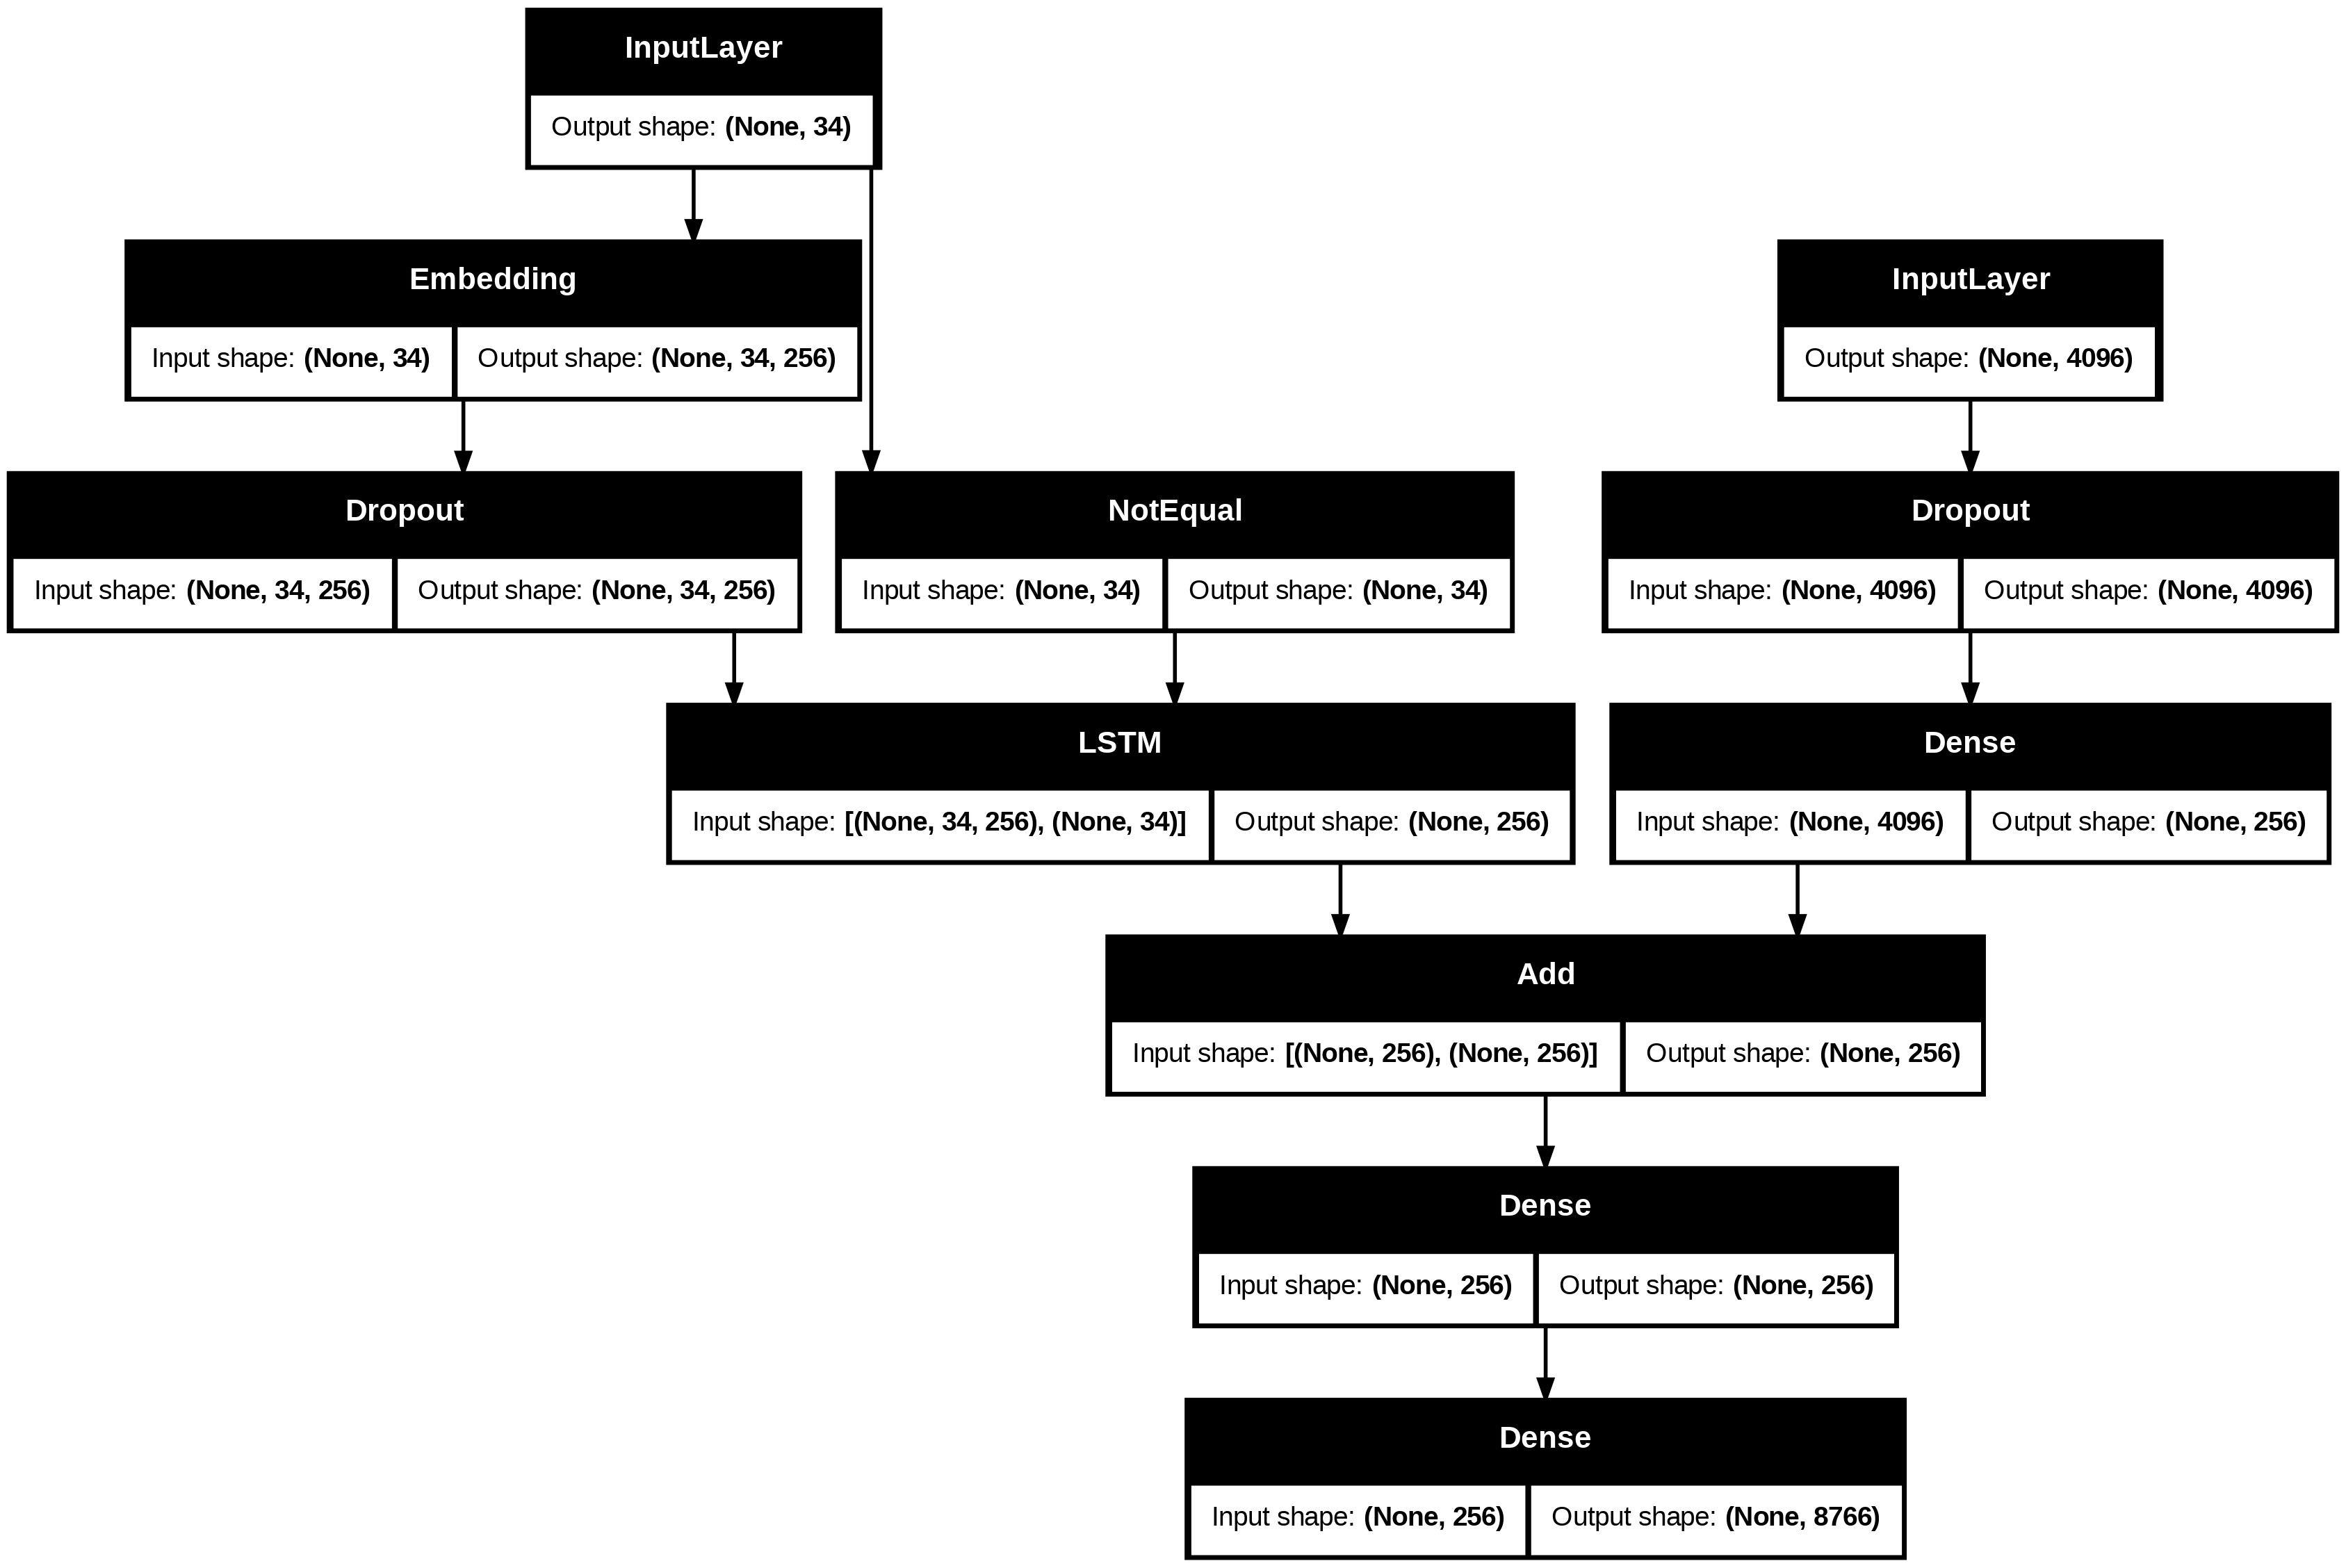

In [ ]:
#encoder model
#image feature model
inputs1= Input(shape=(4096,))
fe1= Dropout(0.4)(inputs1)
fe2= Dense(256, activation='relu')(fe1)
#sequence feature layer
input2= Input(shape=(max_length,))
se1= Embedding(vocab_size, 256, mask_zero=True)(input2)
se2= Dropout(0.4)(se1)
se3= LSTM(256)(se2)

#decoder model
decoder1= add([fe2, se3])
decoder2= Dense(256, activation='relu')(decoder1)
outputs= Dense(vocab_size, activation='softmax')(decoder2)

model= Model(inputs=[inputs1, input2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

#plot the model
plot_model(model, show_shapes=True)


In [ ]:
# Modified training loop
def train_model(model, train_data, mapping, features, tokenizer, max_length, vocab_size, batch_size, epochs):
    steps = len(train_data) // batch_size

    generator = data_generator(
        train_data,
        mapping,
        features,
        tokenizer,
        max_length,
        vocab_size,
        batch_size
    )

    history = model.fit(
        generator,
        steps_per_epoch=steps,
        epochs=epochs,
        verbose=1
    )

    return history

In [ ]:
#modified model train code



In [ ]:
#train the model
epochs= 3
batch_size= 64
steps= len(train) // batch_size
print(len(train))
print(steps)

for i in range(epochs):
  #create data generator
  generator= data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
  #fit for one epoch
  model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)






7281
113


ValueError: Missing data for input "input_layer_4". You passed a data dictionary with keys ['input_1', 'input_2']. Expected the following keys: ['input_layer_4', 'input_layer_5']

In [ ]:
# Training parameters
epochs = 3
batch_size = 64

# Train the model
history = train_model(
    model,
    train,
    mapping,
    features,
    tokenizer,
    max_length,
    vocab_size,
    batch_size,
    epochs
)

In [ ]:
# Print model input names
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.InputLayer):
        print(f"Input layer name: {layer.name}")

Input layer name: input_layer_5
Input layer name: input_layer_4


In [ ]:
# Training parameters
epochs = 3
batch_size = 64
steps = len(train) // batch_size
print(len(train))
print(steps)

# Create data generator with proper TensorFlow formatting
generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)

# Train for specified number of epochs
model.fit(
    generator,
    epochs=epochs,
    steps_per_epoch=steps,
    verbose=1
)

7281
113
Epoch 1/3


ValueError: Missing data for input "input_layer_4". You passed a data dictionary with keys ['input_1', 'input_2']. Expected the following keys: ['input_layer_4', 'input_layer_5']

In [ ]:
#plot the model
plot_model(model, show_shapes=True)

In [ ]:
#save the model
model.save(WORKING_DIR+ '/best_model.h5')

#Generate captions for the image

In [ ]:
def idx_to_word(integer, tokenizer):
  for word, index in tokenizer.word_index.items():
    if index == integer:
      return word
  return None

In [ ]:
#Generate caption for an image
def predict_caption(model, image, tokenizer, max_lenghth):
  #add start tag for generation process
  in_text= '<start>'
  for i in range(max_length):
    #encode input sequence
    sequence= tokenizer.texts_to_sequences([in_text])[0]
    #pad the sequence
    sequence= pad_sequences([sequence], maxlen=max_length)
    #predict next word
    yhat= model.predict([image, sequence], verbose=0)
    #get index with high probability
    yhat= np.argmax(yhat)
    #convert index to word
    word= idx_to_word(yhat, tokenizer)
    #stop if word not found
    if word is None:
      break
    #append word as input for generating next word
    in_text += " " + word
    #stop if we reach end tag
    if word == '<end>':
      break
  return in_text


In [ ]:
from nltk.translate.bleu_score import corpus_bleu
#validate with text data
actual, predicted= list(), list()

for key in tqdm(test):
  #get actual captions
  captions= mapping[key]
  #predict the caption for image
  y_pred= predict_caption(model, features[key], tokenizer, max_length)
  #store the actual and predicted captions
  actual_captions= [caption.split() for caption in captions]
  y_pred= y_pred.split()
  actual.append(actual_captions)
  predicted.append(y_pred)

#calculate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

#Visualize the Results

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    #load the image
    #image_name= '1001773457_577c3a7d70.jpg'
    image_id= image_name.split('.')[0]
    img_path= os.path.join(directory, image_name)
    image= Image.open(img_path)
    captions= mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
      print(caption)

    #predict the caption
    y_pred= predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

In [ ]:
generate_caption('1001773457_577c3a7d70.jpg')

In [ ]:
generate_caption('1002674143_1b742ab4b8.jpg')